# Malicious ClusterScan

Describes/summarizes the or set of clusters. Useful for when you aim to enlist the summarized malware types found in each cluster in order by Type # as presented in VirusTotal such that the first ones on the list per cluster are Type 1 (most popular), followed by Type 2 then Type 3 (least popular).

Note that this notebook only makes use of the verified xxxx_SampleHash_Common.csv file which represents a significant majority of the entire Oliveira dataset.  

## Import Libraries/Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.rcParams["figure.autolayout"] = True

malicious_df = pd.read_csv('./Labelled_Manual_DBSCAN_SampleHash_Common.csv', low_memory=False, index_col=False) #This should point to a VirusTotal verified <Data Clustering>_SampleHash_Common.csv file

#Load list of API calls
API_LIST = "../api_calls.txt"
DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

def list_to_str(ls:list):
    output = ""
    for l in ls:
        output += str(l) + " "
    return output[0:len(output)-1]

def inject_patterns(inner_df:pd.DataFrame):
    patterns = []
    for row in range(inner_df.shape[0]):
        patterns.append(list_to_str(inner_df.iloc[row,2:5].transpose().to_list()))
    inner_df['type_pattern'] = patterns
    return inner_df

def get_unique_clusters(df:pd.DataFrame):
    return list(df['cluster'].unique())

def get_summary(df:pd.DataFrame):
    #Identify the overall list of types each cluster is as designated by VirusTotal.
    unique_clusters = get_unique_clusters(df)
    summary = []
    for u in unique_clusters:
        cluster_sublist = [u]
        df_copy = malicious_df[malicious_df['cluster'] == u].copy(deep=True)
        idx = list(df_copy['Type 1'].value_counts().index)
        counts = list(df_copy['Type 1'].value_counts())
        type_sublist = []
        for i in range(len(idx)):
            type_sublist.append([idx[i], counts[i]])
        cluster_sublist.append(type_sublist)
        # str_summary = []
        # cluster_sublist.append(list(df_copy['type_pattern'].value_counts().index))
        # cluster_sublist.append(list(df_copy['type_pattern'].value_counts()))
        summary.append(cluster_sublist)
    return summary

DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

from sklearn.preprocessing import LabelEncoder
#Inverse Label Encoding
def inverse_label(item):
    global APIS
    return item.map(lambda x: APIS[int(x)])
oliveira = pd.read_csv('../oliveira.csv', low_memory=False)
oliveira.iloc[:, 1:101] = oliveira.iloc[:, 1:101].apply(inverse_label, axis=1, result_type='reduce')

def how_many_clusters():
    c = malicious_df['cluster'].unique()
    c.sort()
    display(c.size)

C:\Users\ejose\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## DataFrame Preview

,cluster,hash,Type 1,Type 2,Type 3,pattern
0,0,071e8c3f8922e186e57548cd4c703a5d,trojan,_,_,"RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClos..."
1,1,33f8e6d08a6aae939f25a8e0d63dd523,pua,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."
2,2,b68abd064e975e1c6d5f25e748663076,trojan,_,_,"SetUnhandledExceptionFilter,OleInitialize,LdrL..."
3,-1,72049be7bd30ea61297ea624ae198067,trojan,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."
4,-1,c9b3700a77facf29172f32df6bc77f48,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
5,-1,cc6217be863e606e49da90fee2252f52,trojan,_,_,"LdrGetProcedureAddress,NtAllocateVirtualMemory..."
6,3,f7a1a3c38809d807b3f5f4cc00b1e9b7,downloader,_,_,"NtClose,NtOpenKey,NtQueryValueKey,NtClose,NtOp..."
7,-1,164b56522eb24164184460f8523ed7e2,adware,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
8,4,56ae1459ba61a14eb119982d6ec793d7,adware,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
9,5,c4148ca91c5246a8707a1ac1fd1e2e36,downloader,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."


(42797, 6)

<Axes: ylabel='Type 1'>

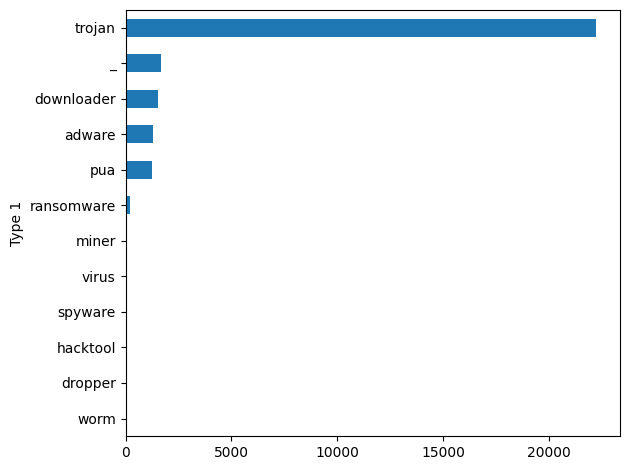

In [2]:
#Replace '-' empty malware type delimiter with '_' for consistency
malicious_df.replace(to_replace='-',value='_', inplace=True)
display(malicious_df.head(10))
display(malicious_df.shape)
malicious_df['Type 1'].value_counts(ascending=True).plot(kind='barh')

In [3]:
#INJECT PATTERN (i.e., summarized malware type pattern) to the DataFrame
malicious_df = inject_patterns(malicious_df)

#DROP ROWS THAT ARE FALSELLY LABELLED. (i.e. '_' on all popularity levels of VirusTotal)
malicious_df.drop(malicious_df[(malicious_df['Type 1']=='_')].index, inplace=True)

how_many_clusters()

600

## "What Malware Types can be found in the overall dataset?"

### This is regardless of cluster.

Type 1
trojan        22224
downloader     1523
adware         1293
pua            1240
ransomware      228
miner            90
virus            55
spyware          33
hacktool          9
dropper           4
worm              1
Name: count, dtype: int64

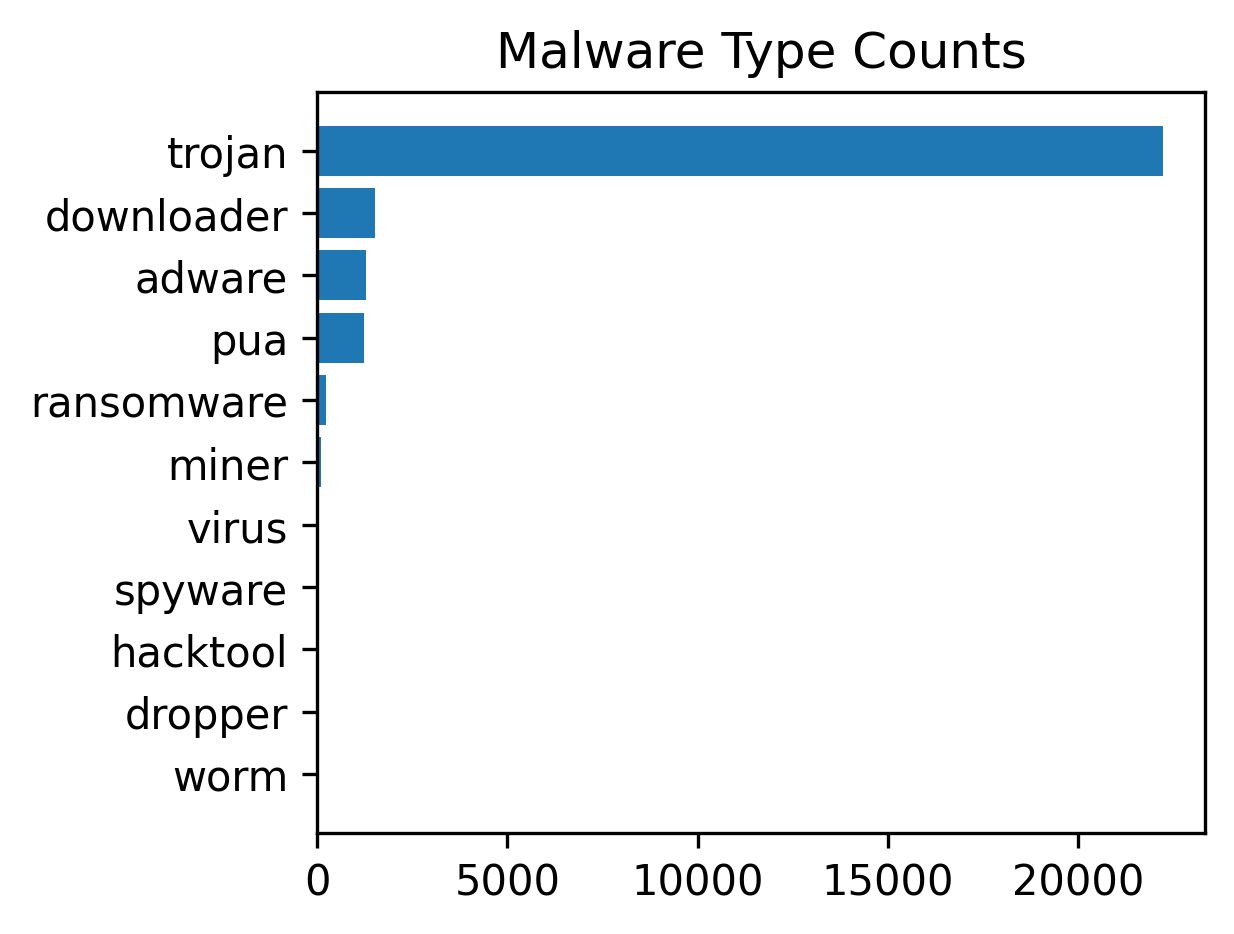

In [4]:
output = malicious_df['Type 1'].value_counts()
str_output = str(output) + "\n\n"
with open("./Output/1 MalwareTypes_in_Dataset.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
display(output)
fig, axs = plt.subplots(nrows=1, layout='constrained')
fig.set_figwidth(4)
fig.set_figheight(3)
fig.set_dpi(300)
axs.set_title('Malware Type Counts')
axs.barh(malicious_df['Type 1'].value_counts().index, malicious_df['Type 1'].value_counts())
axs.invert_yaxis()
# axs[1].set_title('Type 2 Malware Type Counts')
# axs[1].invert_yaxis()
# axs[1].barh(malicious_df['Type 2'].value_counts().index, malicious_df['Type 2'].value_counts())
# axs[2].invert_yaxis()
# axs[2].set_title('Type 3 (Least \'Popular\') Malware Type Counts')
# axs[2].barh(malicious_df['Type 3'].value_counts().index, malicious_df['Type 3'].value_counts())
plt.savefig("./Output/1 Popular Malware Types in Dataset.png")

In [5]:
#DROP ROWS WITH NA TO HAVE CLEAN CLUSTERS
import numpy as nan
malicious_df.dropna(inplace=True, subset=['Type 1'])
malicious_df['Type 1'].unique()

array(['trojan', 'pua', 'downloader', 'adware', 'hacktool', 'miner',
       'virus', 'spyware', 'ransomware', 'dropper', 'worm'], dtype=object)

In [6]:
# DROP CLUSTERS WITH MORE THAN 1 MALWARE TYPE UNDER IT (i.e. NOISE)
unique_clusters = get_unique_clusters(malicious_df)
for u in unique_clusters:
    if len(malicious_df[malicious_df['cluster'] == u]['Type 1'].unique()) > 1:
        malicious_df = malicious_df.drop(malicious_df[malicious_df['cluster'] == u].index)
malicious_df.head()

,cluster,hash,Type 1,Type 2,Type 3,pattern,type_pattern
2,2,b68abd064e975e1c6d5f25e748663076,trojan,_,_,"SetUnhandledExceptionFilter,OleInitialize,LdrL...",trojan _ _
11,7,e7ac6a2de45506164777941faf953094,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",trojan _ _
18,9,8220417d83184f62f5734a0c1d140e89,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",trojan _ _
19,10,a36c063345128d22bf1dd003af2eb36d,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",trojan _ _
27,15,d6fa2fa31148f6c4a2a1d9837dcda3b4,trojan,_,_,"RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClos...",trojan _ _


## How many clusters are there?

In [7]:
how_many_clusters()

384

## "What Malware Types are there in each cluster?"


### Identify the counts of Malware Types per Cluster

This indicates the malware types (including the # of instances) found in each cluster.

In [8]:
str_output = ""
summary = get_summary(malicious_df)
summary.sort()
for s in summary:
    str_output += f"CLUSTER {s[0]}: "
    for t in s[1]:
        str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 2: "
    # for t in s[2]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 3: "
    # for t in s[3]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tMost Popular Malware Type Combination (in order Most to Least):\n"
    # for i,t in enumerate(s[4]):
    #     str_output += f"\t    {i+1} {t:12s} ({s[5][i]})\n"
    str_output += "\n"
with open("./Output/1 MalwareType_per_Cluster.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

CLUSTER 2: trojan (6); 
CLUSTER 7: trojan (9); 
CLUSTER 9: trojan (16); 
CLUSTER 10: trojan (9); 
CLUSTER 15: trojan (22); 
CLUSTER 18: trojan (62); 
CLUSTER 20: trojan (10); 
CLUSTER 24: trojan (64); 
CLUSTER 28: trojan (26); 
CLUSTER 30: trojan (8); 
CLUSTER 32: trojan (3); 
CLUSTER 34: trojan (8); 
CLUSTER 37: trojan (14); 
CLUSTER 40: pua (6); 
CLUSTER 41: trojan (26); 
CLUSTER 42: trojan (5); 
CLUSTER 44: trojan (7); 
CLUSTER 45: trojan (27); 
CLUSTER 46: trojan (83); 
CLUSTER 47: trojan (15); 
CLUSTER 49: trojan (6); 
CLUSTER 50: adware (4); 
CLUSTER 51: trojan (8); 
CLUSTER 52: virus (4); 
CLUSTER 53: trojan (60); 
CLUSTER 60: trojan (176); 
CLUSTER 61: trojan (10); 
CLUSTER 64: trojan (5); 
CLUSTER 68: trojan (2); 
CLUSTER 69: trojan (8); 
CLUSTER 70: trojan (198); 
CLUSTER 72: trojan (14); 
CLUSTER 73: trojan (24); 
CLUSTER 74: trojan (86); 
CLUSTER 76: trojan (5); 
CLUSTER 79: trojan (7); 
CLUSTER 83: adware (12); 
CLUSTER 84: trojan (13); 
CLUSTER 85: trojan (11); 
CLUSTER 8

### Identify the Clusters that have the same Unique Malware Type

This indicates what clusters have verified malicious samples that match specific Malware Types.

This indicates the most occuring Malware Type which extends to the most 'popular' malware type that is probably found in the dataset.

Such findings may also be used as a reflection as to what malware types are most prevalent in the wild.

In [9]:
# Summarize Clusters that have the same malware types as per VirusTotal.
str_output = f"# of Unique Malware Type: {len(malicious_df['Type 1'].unique())}" + "\n\n"

cluster_instance_summary = [0] * len(list(malicious_df['cluster'].unique()))
count_summary = []
for i, u in enumerate(list(malicious_df['Type 1'].unique())):
    matching = malicious_df[malicious_df['Type 1'] == u]['cluster']
    count_summary.append([u, len(list(matching)), len(list(matching.unique())) ,str(list(matching.unique()))])
    str_output += f"Unique Malware Type: {i+1}".upper() + "\n"
    str_output += f"Malware Type: {u}" + "\n"
    str_output += f"Matching Clusters Count: {len(list(matching.unique()))}" + "\n"
    str_output += f"Matching Clusters: {list(matching.unique())}" + "\n"
    str_output += "\n"
with open("./Output/1 Clusters_on_Unique_MalwareType.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

count_summary.sort(key=lambda x: x[1])
count_summary = pd.DataFrame(count_summary, columns=['Malware Type', 'No. of Matching Verified Samples', 'No. of Matching Clusters', "Matching Clusters"])

count_summary.sort_values(by='No. of Matching Clusters',ascending=False, inplace=True)
display("Top 10 Most Common Malware Type (by Cluster Count)")
display(count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10])
count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10].to_csv("./Output/1 10_Most_Common_MalwareType_byClusterCount.csv", index=False)

# of Unique Malware Type: 7

UNIQUE MALWARE TYPE: 1
Malware Type: trojan
Matching Clusters Count: 354
Matching Clusters: [2, 7, 9, 10, 15, 18, 20, 24, 28, 30, 32, 34, 37, 41, 42, 44, 45, 46, 47, 49, 51, 53, 60, 61, 64, 68, 69, 70, 72, 73, 74, 76, 79, 84, 85, 88, 90, 93, 95, 99, 106, 109, 110, 112, 115, 116, 117, 120, 124, 125, 127, 128, 129, 130, 132, 133, 136, 142, 143, 144, 146, 148, 149, 151, 152, 153, 154, 155, 156, 157, 160, 163, 164, 165, 167, 168, 169, 172, 174, 175, 177, 181, 184, 187, 188, 189, 190, 192, 193, 194, 195, 196, 197, 198, 202, 203, 204, 205, 207, 209, 210, 213, 214, 216, 219, 220, 221, 223, 225, 226, 227, 228, 230, 232, 236, 238, 239, 240, 242, 243, 244, 246, 248, 250, 252, 255, 257, 258, 261, 262, 263, 265, 267, 268, 269, 272, 274, 276, 278, 280, 282, 284, 285, 287, 288, 294, 295, 296, 298, 299, 300, 302, 303, 305, 307, 309, 310, 311, 312, 314, 304, 316, 317, 318, 320, 322, 323, 324, 325, 327, 328, 331, 332, 334, 335, 339, 180, 340, 341, 343, 344, 345, 346, 347, 3

'Top 10 Most Common Malware Type (by Cluster Count)'

,Malware Type,No. of Matching Clusters,Matching Clusters
6,trojan,354,"[2, 7, 9, 10, 15, 18, 20, 24, 28, 30, 32, 34, ..."
5,adware,17,"[50, 83, 134, 138, 313, 350, 402, 423, 469, 47..."
4,pua,8,"[215, 40, 375, 537, 568, 408, 338, 126]"
3,ransomware,2,"[101, 266]"
0,downloader,1,[532]
1,hacktool,1,[348]
2,virus,1,[52]


## "What the API Calls are in each Malware Type"

In [10]:
malware_types = count_summary['Malware Type'].to_list()
malware_apis = []

pd.set_option("display.max_rows", None)

print("Top 10 API CALLS PER MALWARE TYPE")
for m in malware_types:
    hashes = malicious_df[malicious_df['Type 1'] == m]['hash'].to_list()
    complete = []
    for h in hashes:
        complete += oliveira[oliveira['hash']==h].iloc[0,1:101].to_list()
    ser = pd.Series(complete, name=m)
    ser.value_counts().to_csv(f"./Output/1_APICALL_{m}.csv")
    malware_apis.append(ser.unique().tolist())
    display(ser.value_counts())

Top 10 API CALLS PER MALWARE TYPE


trojan
LdrGetProcedureAddress               65962
LdrLoadDll                           43912
LdrGetDllHandle                      24466
RegOpenKeyExW                        22599
NtClose                              17364
LoadResource                         16823
RegQueryValueExW                     16663
FindResourceExW                      15994
NtAllocateVirtualMemory              15132
RegCloseKey                          11679
NtQueryValueKey                      11154
NtOpenKey                             9552
GetSystemMetrics                      7039
GetSystemTimeAsFileTime               5938
SetErrorMode                          5610
NtProtectVirtualMemory                4388
NtOpenKeyEx                           3938
GetSystemInfo                         3639
NtFreeVirtualMemory                   3144
RegOpenKeyExA                         2739
CoInitializeEx                        2495
GetFileAttributesW                    2404
SetUnhandledExceptionFilter           2353
SetF

adware
LdrGetProcedureAddress         2207
LdrGetDllHandle                1956
NtAllocateVirtualMemory         758
NtClose                         520
LdrLoadDll                      266
GetSystemTimeAsFileTime         258
RegCloseKey                     235
NtOpenKey                       198
NtQueryValueKey                 195
NtReadFile                      165
SetUnhandledExceptionFilter     155
NtDelayExecution                151
SetFilePointer                  144
RegOpenKeyExA                   141
NtFreeVirtualMemory             132
NtCreateFile                    130
SHGetFolderPathW                115
RegOpenKeyExW                    84
socket                           84
NtMapViewOfSection               72
RegSetValueExA                   72
RegQueryValueExA                 69
GetSystemMetrics                 67
LoadResource                     65
NtCreateMutant                   64
RegCreateKeyExW                  63
WSAStartup                       60
Process32NextW       

pua
LdrGetProcedureAddress               353
LdrLoadDll                           285
NtClose                              160
NtAllocateVirtualMemory              137
LdrGetDllHandle                      132
GetSystemDirectoryW                   98
RegOpenKeyExW                         91
RegCloseKey                           86
NtCreateFile                          71
NtMapViewOfSection                    66
SetFilePointer                        63
RegQueryValueExW                      61
NtReadFile                            54
GetSystemWindowsDirectoryW            52
NtOpenKey                             50
NtQueryValueKey                       50
NtFreeVirtualMemory                   50
NtCreateSection                       49
SetErrorMode                          42
RegOpenKeyExA                         34
GetSystemInfo                         33
LoadStringW                           31
GetSystemMetrics                      30
GetFileSize                           27
NtQueryAttri

ransomware
NtClose                       100
NtAllocateVirtualMemory        96
NtQuerySystemInformation       92
NtFreeVirtualMemory            72
NtOpenKey                      64
RegOpenKeyExW                  52
RegQueryValueExW               52
RegCloseKey                    48
NtQueryValueKey                36
LdrGetProcedureAddress         20
NtMapViewOfSection             12
NtCreateSection                12
LdrLoadDll                     12
NtCreateFile                   12
NtCreateMutant                  8
GetSystemWindowsDirectoryW      8
LdrGetDllHandle                 8
NtQueryInformationFile          8
NtOpenFile                      8
NtEnumerateValueKey             8
NtEnumerateKey                  8
CreateToolhelp32Snapshot        8
Process32NextW                  4
GetUserNameW                    4
SHGetFolderPathW                4
NtOpenMutant                    4
NtOpenProcess                   4
NtDelayExecution                4
Process32FirstW                 4
NtT

downloader
LdrGetProcedureAddress         20
LdrGetDllHandle                17
NtAllocateVirtualMemory         7
NtClose                         7
NtOpenKey                       6
NtQueryValueKey                 5
LoadResource                    5
LdrLoadDll                      4
GetSystemMetrics                4
FindResourceExW                 3
FindResourceA                   2
NtFreeVirtualMemory             2
CreateActCtxW                   2
SetWindowsHookExA               2
GetSystemTimeAsFileTime         1
NtCreateSection                 1
GetForegroundWindow             1
RegCloseKey                     1
RegOpenKeyExW                   1
NtMapViewOfSection              1
RegOpenKeyExA                   1
NtCreateFile                    1
GetSystemWindowsDirectoryW      1
SizeofResource                  1
SetErrorMode                    1
GetCursorPos                    1
SetUnhandledExceptionFilter     1
RegQueryValueExW                1
Name: count, dtype: int64

hacktool
NtClose                       27
FindFirstFileExW              21
LdrGetProcedureAddress         7
SetErrorMode                   6
LdrGetDllHandle                6
NtReadFile                     5
NtQueryAttributesFile          4
NtOpenFile                     4
SetFilePointer                 4
NtCreateFile                   4
NtSetInformationFile           2
NtAllocateVirtualMemory        2
GetSystemWindowsDirectoryW     1
NtCreateSection                1
NtMapViewOfSection             1
GetTempPathW                   1
LdrLoadDll                     1
NtQueryInformationFile         1
CreateDirectoryW               1
CreateThread                   1
Name: count, dtype: int64

virus
NtWriteFile                72
NtReadFile                 72
LdrGetProcedureAddress     52
LdrLoadDll                 44
NtClose                    16
FindResourceExW            16
LdrGetDllHandle            12
NtAllocateVirtualMemory    12
LoadResource               12
NtCreateFile               12
NtOpenKey                   8
NtQueryValueKey             8
LoadStringA                 8
GetSystemMetrics            8
RegOpenKeyExA               8
SetFilePointer              4
GetFileAttributesW          4
GetTempPathW                4
RegCloseKey                 4
NtFreeVirtualMemory         4
RegQueryValueExA            4
GetFileType                 4
GetTimeZoneInformation      4
NtQueryAttributesFile       4
GetSystemInfo               4
Name: count, dtype: int64

## "What the Unique API Calls are in each Malware Type"

In [11]:
for i,m in enumerate(malware_types):
    print(i, m)
    m_list = malware_apis[i]
    for j in range(len(malware_apis)):
        if j != i:
            for k in m_list[:]:
                if k in malware_apis[j]:
                    m_list.remove(k)
    print(m_list)
    print("\n")

0 trojan
['LookupPrivilegeValueW', 'GetUserNameA', 'RegEnumKeyExA', 'NtOpenKeyEx', 'NtOpenDirectoryObject', 'CryptCreateHash', 'CryptHashData', 'EnumWindows', 'RegQueryInfoKeyW', 'RegEnumKeyExW', 'DrawTextExW', 'SearchPathW', 'FindResourceExA', 'ReadProcessMemory', 'OpenSCManagerA', 'OpenServiceA', 'StartServiceA', 'WriteConsoleA', 'NtUnmapViewOfSection', 'CryptDecrypt', 'RegEnumValueW', 'GetSystemDirectoryA', 'GlobalMemoryStatusEx', 'GlobalMemoryStatus', 'NtDeviceIoControlFile', 'GetVolumePathNamesForVolumeNameW', 'GetVolumePathNameW', 'StartServiceW', 'NtOpenThread', '__exception__', 'NtQueryKey', 'GetShortPathNameW', 'GetFileSizeEx', 'DrawTextExA', 'GetSystemWindowsDirectoryA', 'RegEnumValueA', 'GetDiskFreeSpaceW', 'SetFileAttributesW', 'SetWindowsHookExW', 'NtSuspendThread', 'FindWindowA', 'Module32FirstW', 'Module32NextW', 'RemoveDirectoryW', 'SetFileTime', 'FindWindowW', 'SetStdHandle', 'NtGetContextThread']


1 adware
['WSAStartup', 'getaddrinfo', 'socket', 'ioctlsocket', 'conne

## How many samples remaining?

In [12]:
print(f"{malicious_df.shape[0]}\n{malicious_df.shape[0]/42797*100:.4f}%")

3922
9.1642%


## What are the remaining clusters?

In [13]:
how_many_clusters()

384